# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<hr/>

# Setting the path

In [2]:
path = "/Users/kalturaqa/Desktop/TCBDA/Python"

<hr/>

# Reading the CSV file

In [3]:
churn = pd.read_csv(path + "/churn.csv")
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<hr/>

# Renaming all columns names to lower case

In [4]:
churn = churn.rename(columns=str.lower)
churn.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<hr/>

# Replacing values to zeros and ones

In [5]:
# Change "Yes"/"No" value to 1/0 instead
binary_columns = ["partner", "dependents", "phoneservice", "paperlessbilling", "churn"]
for column in binary_columns:
    churn.loc[churn[column] == 'No', column] = 0
    churn.loc[churn[column] == 'Yes', column] = 1
    churn = churn.astype({column: 'int64'})
    
# For the following columns, we will treat "No phone/internet service" and "No" as 0 and "Yes" as 1
other_columns = ["multiplelines", "onlinesecurity", "onlinebackup", "deviceprotection", "techsupport", "streamingtv", "streamingmovies"]
for column in other_columns:
    churn.loc[(churn[column] == 'No phone service') | (churn[column] == 'No internet service'), column] = 0
    churn.loc[churn[column] == 'No', column] = 0
    churn.loc[churn[column] == 'Yes', column] = 1
    churn = churn.astype({column: 'int64'})

churn.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


<hr/>

# Calculating the churn

In [6]:
# Total churn
total = len(churn)
churned = sum(churn["churn"])
print("From a total of " + str(total) + " customers, " + str(churned) + " were churned (" + str((churned / total) * 100) + "%)")

From a total of 7043 customers, 1869 were churned (26.536987079369588%)


<hr/>

# Finding if there are missing values

In [7]:
# No missing values
churn.isna().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

<hr/>

# Checking the data types of the columns

In [8]:
churn.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner               int64
dependents            int64
tenure                int64
phoneservice          int64
multiplelines         int64
internetservice      object
onlinesecurity        int64
onlinebackup          int64
deviceprotection      int64
techsupport           int64
streamingtv           int64
streamingmovies       int64
contract             object
paperlessbilling      int64
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                 int64
dtype: object

<hr/>

# Finding if there any "strange" values in the columns

In [9]:
# The "gender" columns includes only "Male" and "Female" values - no other values
churn.gender.value_counts(normalize=True)

Male      0.504756
Female    0.495244
Name: gender, dtype: float64

In [10]:
# The "seniorcitizen" columns includes only "0" and "1" values - no other values
churn.seniorcitizen.value_counts(normalize=True)

0    0.837853
1    0.162147
Name: seniorcitizen, dtype: float64

In [11]:
# The "partner" columns includes only "0" and "1" values - no other values
churn.partner.value_counts(normalize=True)

0    0.516967
1    0.483033
Name: partner, dtype: float64

In [12]:
# The "dependents" columns includes only "0" and "1" values - no other values
churn.dependents.value_counts(normalize=True)

0    0.700412
1    0.299588
Name: dependents, dtype: float64

In [13]:
# The "phoneservice" columns includes only "0" and "1" values - no other values
churn.phoneservice.value_counts(normalize=True)

1    0.903166
0    0.096834
Name: phoneservice, dtype: float64

In [14]:
# The "multiplelines" columns includes only "0" and "1" values - no other values
churn.multiplelines.value_counts(normalize=True)

0    0.578163
1    0.421837
Name: multiplelines, dtype: float64

In [15]:
# The "internetservice" columns includes only "Fiber optic", "DSL" and "No" values - no other values
churn.internetservice.value_counts(normalize=True)

Fiber optic    0.439585
DSL            0.343746
No             0.216669
Name: internetservice, dtype: float64

In [16]:
# The "onlinesecurity" columns includes only "0" and "1" values - no other values
churn.onlinesecurity.value_counts(normalize=True)

0    0.713332
1    0.286668
Name: onlinesecurity, dtype: float64

In [17]:
# The "onlinebackup" columns includes only "0" and "1" values - no other values
churn.onlinebackup.value_counts(normalize=True)

0    0.655119
1    0.344881
Name: onlinebackup, dtype: float64

In [18]:
# The "deviceprotection" columns includes only "0" and "1" values - no other values
churn.deviceprotection.value_counts(normalize=True)

0    0.656112
1    0.343888
Name: deviceprotection, dtype: float64

In [19]:
# The "techsupport" columns includes only "0" and "1" values - no other values
churn.techsupport.value_counts(normalize=True)

0    0.709783
1    0.290217
Name: techsupport, dtype: float64

In [20]:
# The "streamingtv" columns includes only "0" and "1" values - no other values
churn.streamingtv.value_counts(normalize=True)

0    0.615647
1    0.384353
Name: streamingtv, dtype: float64

In [21]:
# The "streamingmovies" columns includes only "0" and "1" values - no other values
churn.streamingmovies.value_counts(normalize=True)

0    0.612097
1    0.387903
Name: streamingmovies, dtype: float64

In [22]:
# The "contract" columns includes only "Month-to-month, "Two year" and "One year" values - no other values
churn.contract.value_counts(normalize=True)

Month-to-month    0.550192
Two year          0.240664
One year          0.209144
Name: contract, dtype: float64

In [23]:
# The "paperlessbilling" columns includes only "0" and "1" values - no other values
churn.paperlessbilling.value_counts(normalize=True)

1    0.592219
0    0.407781
Name: paperlessbilling, dtype: float64

In [24]:
# The "paymentmethod" columns includes only "Electronic check", "Mailed check", "Bank transfer (automatic)" and "Credit card (automatic) " values
churn.paymentmethod.value_counts(normalize=True)

Electronic check             0.335794
Mailed check                 0.228880
Bank transfer (automatic)    0.219225
Credit card (automatic)      0.216101
Name: paymentmethod, dtype: float64

In [25]:
# The "churn" columns includes only "Electronic check", "Mailed check", "Bank transfer (automatic)" and "Credit card (automatic) " values
churn.churn.value_counts(normalize=True)

0    0.73463
1    0.26537
Name: churn, dtype: float64

<hr/>

# Replace non-numerical values in the "Total Charges" column with the mean value of the column

In [26]:
# It can be seen the "totalcharges" column has a few non-numerical values (which are simply a " " string)
churn.totalcharges.value_counts(normalize=True)

          0.001562
20.2      0.001562
19.75     0.001278
20.05     0.001136
19.9      0.001136
            ...   
6849.4    0.000142
692.35    0.000142
130.15    0.000142
3211.9    0.000142
6844.5    0.000142
Name: totalcharges, Length: 6531, dtype: float64

In [27]:
# The following 11 rows have " " in their "totalcharges" column
non_numerical_rows = churn.loc[churn.totalcharges == ' ']
non_numerical_rows

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,4472-LVYGI,Female,0,1,1,0,0,0,DSL,1,...,1,1,1,0,Two year,1,Bank transfer (automatic),52.55,,0
753,3115-CZMZD,Male,0,0,1,0,1,0,No,0,...,0,0,0,0,Two year,0,Mailed check,20.25,,0
936,5709-LVOEQ,Female,0,1,1,0,1,0,DSL,1,...,1,0,1,1,Two year,0,Mailed check,80.85,,0
1082,4367-NUYAO,Male,0,1,1,0,1,1,No,0,...,0,0,0,0,Two year,0,Mailed check,25.75,,0
1340,1371-DWPAZ,Female,0,1,1,0,0,0,DSL,1,...,1,1,1,0,Two year,0,Credit card (automatic),56.05,,0
3331,7644-OMVMY,Male,0,1,1,0,1,0,No,0,...,0,0,0,0,Two year,0,Mailed check,19.85,,0
3826,3213-VVOLG,Male,0,1,1,0,1,1,No,0,...,0,0,0,0,Two year,0,Mailed check,25.35,,0
4380,2520-SGTTA,Female,0,1,1,0,1,0,No,0,...,0,0,0,0,Two year,0,Mailed check,20.00,,0
5218,2923-ARZLG,Male,0,1,1,0,1,0,No,0,...,0,0,0,0,One year,1,Mailed check,19.70,,0
6670,4075-WKNIU,Female,0,1,1,0,1,1,DSL,0,...,1,1,1,0,Two year,0,Mailed check,73.35,,0


In [28]:
# Let's take all the rows that have numerical values in their "totalcharges" column
numerical_values = churn.loc[churn.totalcharges != ' ']
numerical_values = numerical_values.astype({"totalcharges": 'float64'})

# Let's check if the "totalcharges" column is simply equal to ("monthlycharges" * "tenure") by creating a "check" Series
# Only for the rows with numerical values. otherwise it won't work!
check = (numerical_values.monthlycharges * numerical_values.tenure) - numerical_values.totalcharges

# if all the values in "check" will be 0 we would know it's true
# But we can see that the answer is NO. It means that we should keep the "TotalCharges" column
check

0         0.00
1        46.80
2        -0.45
3        62.75
4       -10.25
         ...  
7038     44.70
7039     67.50
7040    -20.85
7041     -9.00
7042    128.40
Length: 7032, dtype: float64

In [29]:
# So we can replace the " " values (non-numerical values) in the "totalcharges" column with the mean value (which is 2283.3004408418697)
churn.loc[churn["totalcharges"] == ' ', "totalcharges"] = numerical_values.totalcharges.mean()

# Now we can replace the data type of the "totalcharges" column to float64
churn = churn.astype({"totalcharges": 'float64'})

# It can be seen the "totalcharges" column now has only numerical values
churn.totalcharges.value_counts(normalize=True)

2283.300441    0.001562
20.200000      0.001562
19.750000      0.001278
20.050000      0.001136
19.900000      0.001136
                 ...   
6849.400000    0.000142
692.350000     0.000142
130.150000     0.000142
3211.900000    0.000142
6844.500000    0.000142
Name: totalcharges, Length: 6531, dtype: float64

<hr/>

# Group By different columns - display the mean churn for each column

In [30]:
# Gender - is not a factor
churn.groupby('gender').agg({'churn':['count','sum','mean']})

churn               
       count  sum      mean
gender                     
Female  3488  939  0.269209
Male    3555  930  0.261603

In [31]:
# Senior citizen - is a factor
churn.groupby('seniorcitizen').agg({'churn':['count','sum','mean']})

churn                
              count   sum      mean
seniorcitizen                      
0              5901  1393  0.236062
1              1142   476  0.416813

In [32]:
# Partner - is a factor
churn.groupby('partner').agg({'churn':['count','sum','mean']})

churn                
        count   sum      mean
partner                      
0        3641  1200  0.329580
1        3402   669  0.196649

In [33]:
# Dependents - is a factor
churn.groupby('dependents').agg({'churn':['count','sum','mean']})

churn                
           count   sum      mean
dependents                      
0           4933  1543  0.312791
1           2110   326  0.154502

In [34]:
# Phone service - is not a factor
churn.groupby('phoneservice').agg({'churn':['count','sum','mean']})

churn                
             count   sum      mean
phoneservice                      
0              682   170  0.249267
1             6361  1699  0.267096

In [35]:
# Multiple Lines - is not a factor
churn.groupby('multiplelines').agg({'churn':['count','sum','mean']})

churn                
              count   sum      mean
multiplelines                      
0              4072  1019  0.250246
1              2971   850  0.286099

In [36]:
# Internet service - is a factor
churn.groupby('internetservice').agg({'churn':['count','sum','mean']})

churn                
                count   sum      mean
internetservice                      
DSL              2421   459  0.189591
Fiber optic      3096  1297  0.418928
No               1526   113  0.074050

In [37]:
# Online security - is a factor
churn.groupby('onlinesecurity').agg({'churn':['count','sum','mean']})

churn                
               count   sum      mean
onlinesecurity                      
0               5024  1574  0.313296
1               2019   295  0.146112

In [38]:
# Online security - is a factor
churn.groupby('onlinebackup').agg({'churn':['count','sum','mean']})

churn                
             count   sum      mean
onlinebackup                      
0             4614  1346  0.291721
1             2429   523  0.215315

In [39]:
# Device protection - is a factor
churn.groupby('deviceprotection').agg({'churn':['count','sum','mean']})

churn                
                 count   sum      mean
deviceprotection                      
0                 4621  1324  0.286518
1                 2422   545  0.225021

In [40]:
# Tech support - is a factor
churn.groupby('techsupport').agg({'churn':['count','sum','mean']})

churn                
            count   sum      mean
techsupport                      
0            4999  1559  0.311862
1            2044   310  0.151663

In [41]:
# Streaming TV - is not a factor
churn.groupby('streamingtv').agg({'churn':['count','sum','mean']})

churn                
            count   sum      mean
streamingtv                      
0            4336  1055  0.243312
1            2707   814  0.300702

In [42]:
# Streaming movies - is not a factor
churn.groupby('streamingmovies').agg({'churn':['count','sum','mean']})

churn                
                count   sum      mean
streamingmovies                      
0                4311  1051  0.243795
1                2732   818  0.299414

In [43]:
# Contract - is a factor
churn.groupby('contract').agg({'churn':['count','sum','mean']})

churn                
               count   sum      mean
contract                            
Month-to-month  3875  1655  0.427097
One year        1473   166  0.112695
Two year        1695    48  0.028319

In [44]:
# Paperless billing - is a factor
churn.groupby('paperlessbilling').agg({'churn':['count','sum','mean']})

churn                
                 count   sum      mean
paperlessbilling                      
0                 2872   469  0.163301
1                 4171  1400  0.335651

In [45]:
# Payment method - is a factor
churn.groupby('paymentmethod').agg({'churn':['count','sum','mean']})

churn                
                          count   sum      mean
paymentmethod                                  
Bank transfer (automatic)  1544   258  0.167098
Credit card (automatic)    1522   232  0.152431
Electronic check           2365  1071  0.452854
Mailed check               1612   308  0.191067

<hr/>

# Create a new column "Tenure Years" to group together different tenure periods

       churn               
       count  sum      mean
tenure                     
0         11    0  0.000000
1        613  380  0.619902
2        238  123  0.516807
3        200   94  0.470000
4        176   83  0.471591
...      ...  ...       ...
68       100    9  0.090000
69        95    8  0.084211
70       119   11  0.092437
71       170    6  0.035294
72       362    6  0.016575

[73 rows x 3 columns]


Text(0.5, 1.0, 'Tenure Distribution')

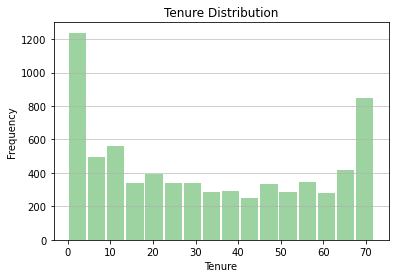

In [46]:
# There are many different values for the "tenure" column
group_by_tenure = churn.groupby('tenure').agg({'churn':['count','sum','mean']})
print(group_by_tenure)

plt.hist(x=churn['tenure'], bins='auto', color='#85C88A',alpha=0.8, rwidth=0.9)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Tenure Distribution')

In [47]:
# Let's create a new column - "tenureYears"
churn["tenureYears"] = None
churn.loc[churn['tenure'] <= 12,'tenureYears'] = "0-1"
churn.loc[(churn['tenure'] > 12) & (churn['tenure'] <= 24),'tenureYears'] = "1-2"
churn.loc[(churn['tenure'] > 24) & (churn['tenure'] <= 36),'tenureYears'] = "2-3"
churn.loc[(churn['tenure'] > 36) & (churn['tenure'] <= 48),'tenureYears'] = "3-4"
churn.loc[(churn['tenure'] > 48) & (churn['tenure'] <= 60),'tenureYears'] = "4-5"
churn.loc[churn['tenure'] >= 60,'tenureYears'] = "5+"
churn.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,tenureYears
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,0-1
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,0,0,0,One year,0,Mailed check,56.95,1889.50,0,2-3
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,0-1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,3-4
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,0-1


In [48]:
# Tenure years - is a factor
churn.groupby('tenureYears').agg({'churn':['count','sum','mean']})

churn                
            count   sum      mean
tenureYears                      
0-1          2186  1037  0.474382
1-2          1024   294  0.287109
2-3           832   180  0.216346
3-4           762   145  0.190289
4-5           756   114  0.150794
5+           1483    99  0.066757

<hr/>

# Create a new column "Monthly Charges Group" to group together different values for monthly charges

Text(0.5, 1.0, 'Monthly Charges Distribution')

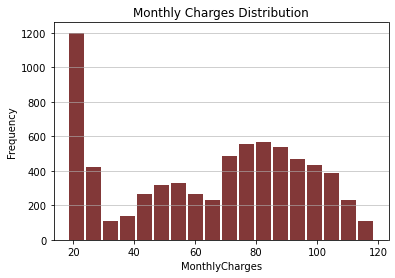

In [49]:
# Many customers don't pay a lot of money each month
plt.hist(x=churn['monthlycharges'], bins='auto', color='#630606',alpha=0.8, rwidth=0.9)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('MonthlyCharges')
plt.ylabel('Frequency')
plt.title('Monthly Charges Distribution')

In [50]:
# Let's create a new column - "MonthlyChargesGroup"
churn["MonthlyChargesGroup"] = None
churn.loc[churn['monthlycharges'] < 25, 'MonthlyChargesGroup'] = "0-25"
churn.loc[(churn['monthlycharges'] >= 25) & (churn['monthlycharges'] < 50), 'MonthlyChargesGroup'] = "25-50"
churn.loc[(churn['monthlycharges'] >= 50) & (churn['monthlycharges'] < 75), 'MonthlyChargesGroup'] = "50-75"
churn.loc[(churn['monthlycharges'] >= 75) & (churn['monthlycharges'] < 100), 'MonthlyChargesGroup'] = "75-100"
churn.loc[churn['monthlycharges'] >= 100, 'MonthlyChargesGroup'] = "100+"
churn.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,tenureYears,MonthlyChargesGroup
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,0-1,25-50
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,0,0,One year,0,Mailed check,56.95,1889.50,0,2-3,50-75
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,0-1,50-75
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,3-4,25-50
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,0-1,50-75


In [51]:
# Monthly charges group - is a factor
churn.groupby("MonthlyChargesGroup").agg({'churn':['count','sum','mean']})

churn               
                    count  sum      mean
MonthlyChargesGroup                     
0-25                 1389  127  0.091433
100+                  908  257  0.283040
25-50                 905  234  0.258564
50-75                1621  424  0.261567
75-100               2220  827  0.372523

<hr/>

# Looking at the range of values for "Total Charges"

Text(0.5, 1.0, 'Total Charges Distribution')

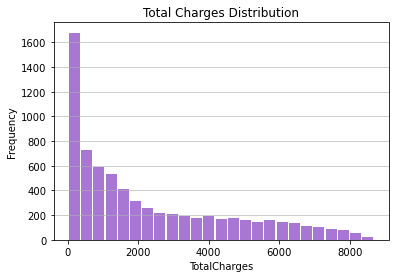

In [52]:
plt.hist(x=churn['totalcharges'], bins='auto', color='#9254C8',alpha=0.8, rwidth=0.9)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('TotalCharges')
plt.ylabel('Frequency')
plt.title('Total Charges Distribution')

<hr/>

# One Hot Encoding

In [53]:
# Save the "customerid" column in a different Series
# Drop the "customerid" column from the DataFrame before performing "One hot encoding" because we don't want a column for each unique CustomerID
customer_id = churn.customerid
churn = churn.drop(["customerid"], axis=1)
# Perform "One hot encoding"
churn = pd.get_dummies(churn)
# Bring back the "customerid" column to the DataFrame
churn["customerid"] = customer_id
churn.head(10)

,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,...,tenureYears_2-3,tenureYears_3-4,tenureYears_4-5,tenureYears_5+,MonthlyChargesGroup_0-25,MonthlyChargesGroup_100+,MonthlyChargesGroup_25-50,MonthlyChargesGroup_50-75,MonthlyChargesGroup_75-100,customerid
0,0,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,7590-VHVEG
1,0,0,0,34,1,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,5575-GNVDE
2,0,0,0,2,1,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,3668-QPYBK
3,0,0,0,45,0,0,1,0,1,1,...,0,1,0,0,0,0,1,0,0,7795-CFOCW
4,0,0,0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,9237-HQITU
5,0,0,0,8,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,9305-CDSKC
6,0,0,1,22,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1452-KIOVK
7,0,0,0,10,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,6713-OKOMC
8,0,1,0,28,1,1,0,0,1,1,...,1,0,0,0,0,1,0,0,0,7892-POOKP
9,0,0,1,62,1,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,6388-TABGU


In [54]:
# These are the new columns
churn.columns

Index(['seniorcitizen', 'partner', 'dependents', 'tenure', 'phoneservice',
       'multiplelines', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'paperlessbilling',
       'monthlycharges', 'totalcharges', 'churn', 'gender_Female',
       'gender_Male', 'internetservice_DSL', 'internetservice_Fiber optic',
       'internetservice_No', 'contract_Month-to-month', 'contract_One year',
       'contract_Two year', 'paymentmethod_Bank transfer (automatic)',
       'paymentmethod_Credit card (automatic)',
       'paymentmethod_Electronic check', 'paymentmethod_Mailed check',
       'tenureYears_0-1', 'tenureYears_1-2', 'tenureYears_2-3',
       'tenureYears_3-4', 'tenureYears_4-5', 'tenureYears_5+',
       'MonthlyChargesGroup_0-25', 'MonthlyChargesGroup_100+',
       'MonthlyChargesGroup_25-50', 'MonthlyChargesGroup_50-75',
       'MonthlyChargesGroup_75-100', 'customerid'],
      dtype='object')

In [55]:
len(churn.columns)

40

<hr/>

# Finding correlations

In [56]:
churn.corr()

,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,...,tenureYears_1-2,tenureYears_2-3,tenureYears_3-4,tenureYears_4-5,tenureYears_5+,MonthlyChargesGroup_0-25,MonthlyChargesGroup_100+,MonthlyChargesGroup_25-50,MonthlyChargesGroup_50-75,MonthlyChargesGroup_75-100
seniorcitizen,1.000000,0.016479,-0.211185,0.016567,0.008576,0.142948,-0.038653,0.066572,0.059428,-0.060625,...,0.002144,0.027562,-0.000689,0.011719,0.000507,-0.175446,0.102043,-0.037691,-0.019987,0.121912
partner,0.016479,1.000000,0.452676,0.379697,0.017706,0.142057,0.143106,0.141498,0.153786,0.119999,...,-0.048868,0.002744,0.034694,0.096221,0.284101,-0.024945,0.107176,-0.062954,-0.047248,0.032210
dependents,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024526,0.080972,0.023671,0.013963,0.063268,...,-0.002443,0.008396,0.022665,0.030552,0.115337,0.119086,-0.024072,-0.001970,-0.012984,-0.071443
tenure,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,0.327203,0.360277,0.360653,0.324221,...,-0.235469,-0.030287,0.144814,0.304495,0.742860,-0.087511,0.309223,-0.114235,-0.100153,0.024927
phoneservice,0.008576,0.017706,-0.001762,0.008448,1.000000,0.279690,-0.092893,-0.052312,-0.071227,-0.096340,...,0.012473,-0.000646,-0.018877,-0.004333,0.016020,0.115236,0.125969,-0.522760,-0.038817,0.222151
multiplelines,0.142948,0.142057,-0.024526,0.331941,0.279690,1.000000,0.098108,0.202237,0.201137,0.100571,...,-0.044828,0.004482,0.027360,0.074388,0.256270,-0.303426,0.343148,-0.163033,-0.151492,0.267036
onlinesecurity,-0.038653,0.143106,0.080972,0.327203,-0.092893,0.098108,1.000000,0.283832,0.275438,0.354931,...,-0.055714,-0.017031,0.027857,0.064186,0.265592,-0.314208,0.161816,-0.048259,0.147179,0.053794
onlinebackup,0.066572,0.141498,0.023671,0.360277,-0.052312,0.202237,0.283832,1.000000,0.303546,0.294233,...,-0.084028,-0.007349,0.038658,0.088074,0.284665,-0.359624,0.298471,-0.113468,0.046798,0.132036
deviceprotection,0.059428,0.153786,0.013963,0.360653,-0.071227,0.201137,0.275438,0.303546,1.000000,0.333313,...,-0.077286,-0.001032,0.061547,0.065685,0.280808,-0.358833,0.361919,-0.132393,0.001107,0.140623
techsupport,-0.060625,0.119999,0.063268,0.324221,-0.096340,0.100571,0.354931,0.294233,0.333313,1.000000,...,-0.072049,0.006338,0.023017,0.059219,0.264419,-0.316936,0.228231,-0.068848,0.115610,0.051658


<AxesSubplot:>

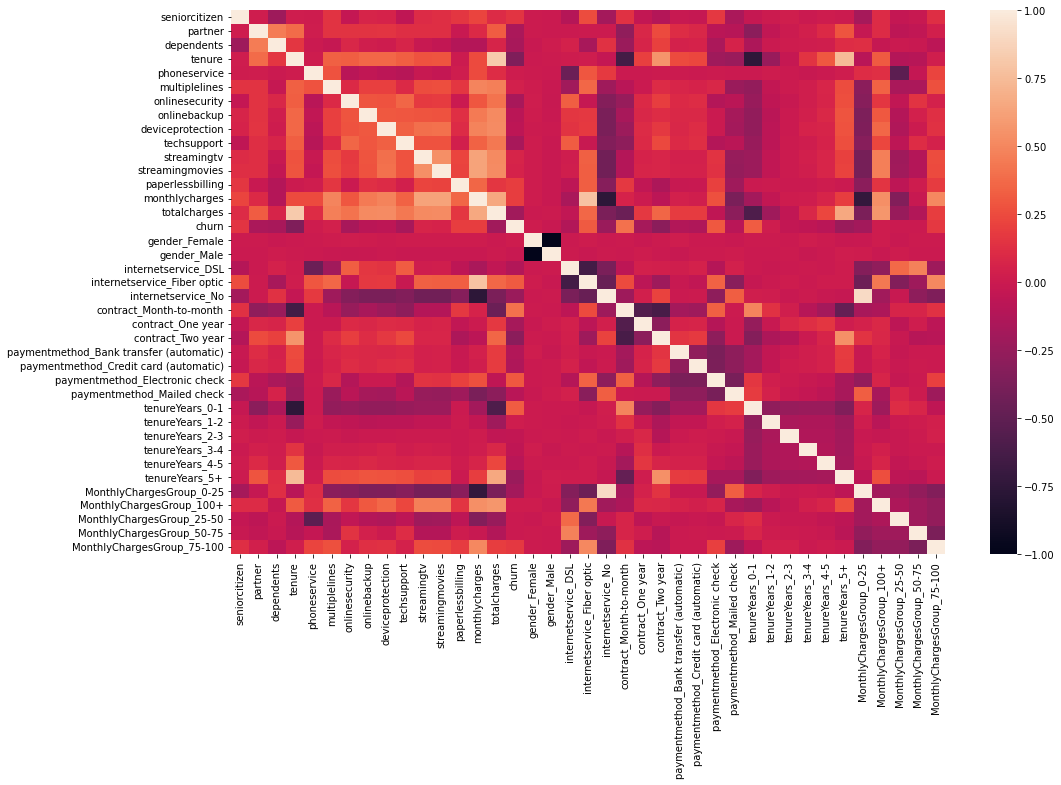

In [57]:
plt.figure(figsize=(16,10))
sns.heatmap(churn.corr())

<AxesSubplot:>

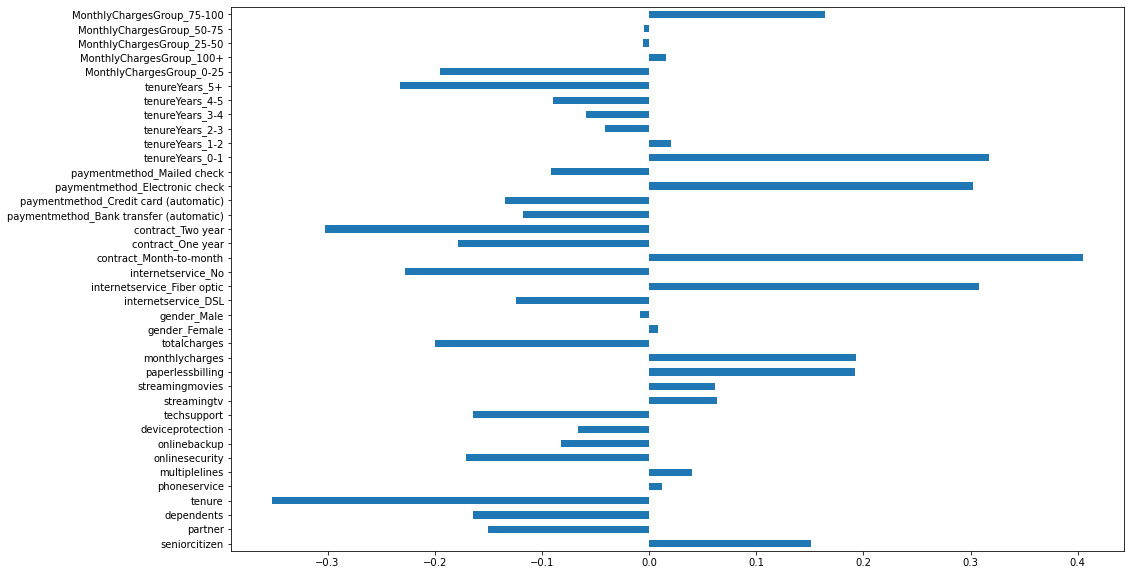

In [58]:
plt.figure(figsize=(16,10))
churn.corr()['churn'].drop('churn').plot(kind='barh')

In [59]:
churn.describe()

,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,...,tenureYears_1-2,tenureYears_2-3,tenureYears_3-4,tenureYears_4-5,tenureYears_5+,MonthlyChargesGroup_0-25,MonthlyChargesGroup_100+,MonthlyChargesGroup_25-50,MonthlyChargesGroup_50-75,MonthlyChargesGroup_75-100
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,...,0.145393,0.118131,0.108193,0.107341,0.210564,0.197217,0.128922,0.128496,0.230158,0.315207
std,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,...,0.352521,0.322787,0.310645,0.309568,0.407738,0.397926,0.335138,0.334665,0.420963,0.464631
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<hr/>

# Save to a new CSV file

In [60]:
churn.to_csv("project_churn_part_1.csv")